In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import japanize_matplotlib


In [15]:
# 積分する関数
def integral(x):
    dx = np.array([])
    sum = 0
    for i in range(len(x)):
        sum += x[i]
        dx = np.append(dx, sum)
    return dx / sampling_rate

# 平滑化する関数
def smooth(x):
    dx = np.array([])
    for i in range(len(x[window:])):
        avg = sum(x[i - int(window/2): i+1 + int(window/2)]) / window
        dx = np.append(dx, avg)

    return dx


In [16]:
# サンプリング周波数
sampling_rate = 100

# グラフの範囲
fig_range = (0, 5)

# グラフの設定
fontsize_title = 25
fontsize_label = 20

# 平滑化の設定
window = 20

In [17]:
# CSVファイルを読み込む
file_path = "./log/walk/"
df_acc = pd.read_csv(
    f"{file_path}Accelerometer.csv",
    header=0,
    names=("time", "x", "y", "z")
)

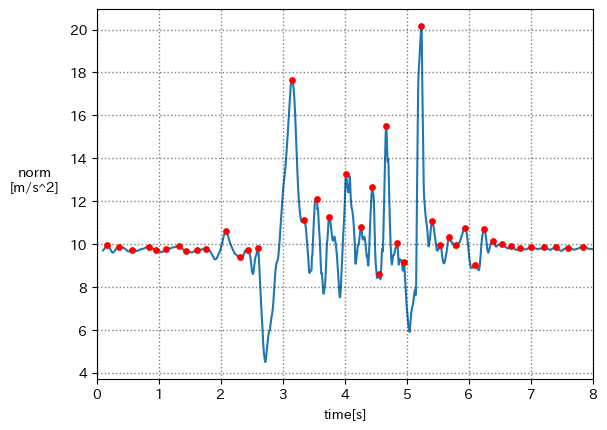

In [18]:
# ノルムを計算
df_acc['norm'] = np.sqrt(df_acc['x']**2 + df_acc['y']**2 + df_acc['z']**2)

# window=10 の移動平均を計算 ローパスフィルター
low_norm = df_acc['norm'].rolling(window=40).mean()

# 　折線グラフを描画
plt.plot(df_acc['time'], low_norm, zorder=1)
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 8)

# ピークを検出
peek, _ = signal.find_peaks(low_norm, distance=50, height=1.5)

# 赤点を描画
plt.scatter(df_acc['time'][peek], low_norm[peek], s=15, color='red', zorder=2)

plt.show()


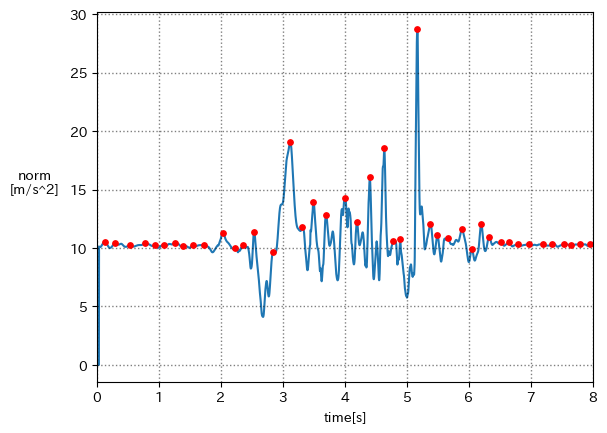

In [19]:
low_norm = smooth(df_acc['norm'])

# 　折線グラフを描画
plt.plot(df_acc['time'][:-20], low_norm, zorder=1)
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 8)

# ピークを検出
peek, _ = signal.find_peaks(low_norm, distance=50, height=1.5)

# 赤点を描画
plt.scatter(df_acc['time'][peek], low_norm[peek], s=15, color='red', zorder=2)

plt.show()


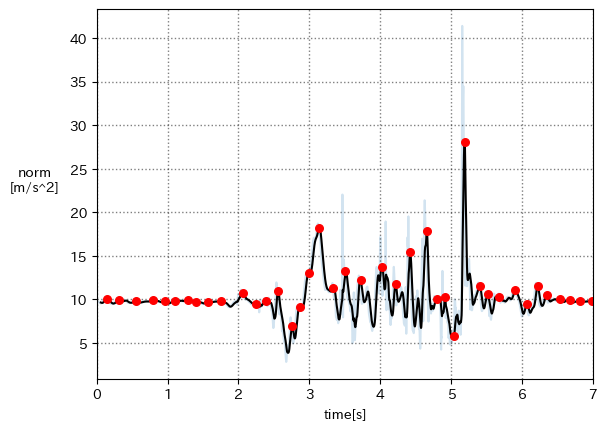

In [20]:
# window=10 の移動平均を計算 ローパスフィルター
low_norm_1 = smooth(df_acc['norm'])
low_norm_2 = df_acc['norm'].rolling(window=20).mean()

# 　折線グラフを描画
plt.plot(df_acc['time'], df_acc['norm'], zorder=1, label="norm", alpha=0.2)
# plt.plot(df_acc['time'][10:-10], low_norm_1, zorder=1, label="自作関数")
plt.plot(df_acc['time'], low_norm_2, zorder=1, label="pandas.rolling()", color='black')
plt.xlabel('time[s]')
plt.ylabel('norm\n[m/s^2]', rotation=0, labelpad=25)
plt.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
plt.xlim(0, 7)

# ピークを検出
peek, _ = signal.find_peaks(low_norm_2, distance=50, height=1.5)
# 赤点を描画
# plt.scatter(df_acc['time'][peek], low_norm_1[peek], s=15, color='red', zorder=2)
plt.scatter(df_acc['time'][peek], low_norm_2[peek], s=30, color='red', zorder=2)

# plt.legend()
plt.show()


In [21]:
# 時間、X軸、Y軸、Z軸のデータを取得
start_time = df_acc['time'][0]
relative_time = df_acc['time'] - start_time - 0.4

data = df_acc['z'].values
smooth_data = smooth(data)

# 積分したデータを格納するリスト
i_data = integral(data)
smooth_i_data = smooth(i_data)
i2_data = integral(i_data)
smooth_i2_data = smooth(i2_data)


/var/folders/4c/xmh8lsq95tdf8y24n_q2rf000000gn/T/ipykernel_8252/2454282919.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)


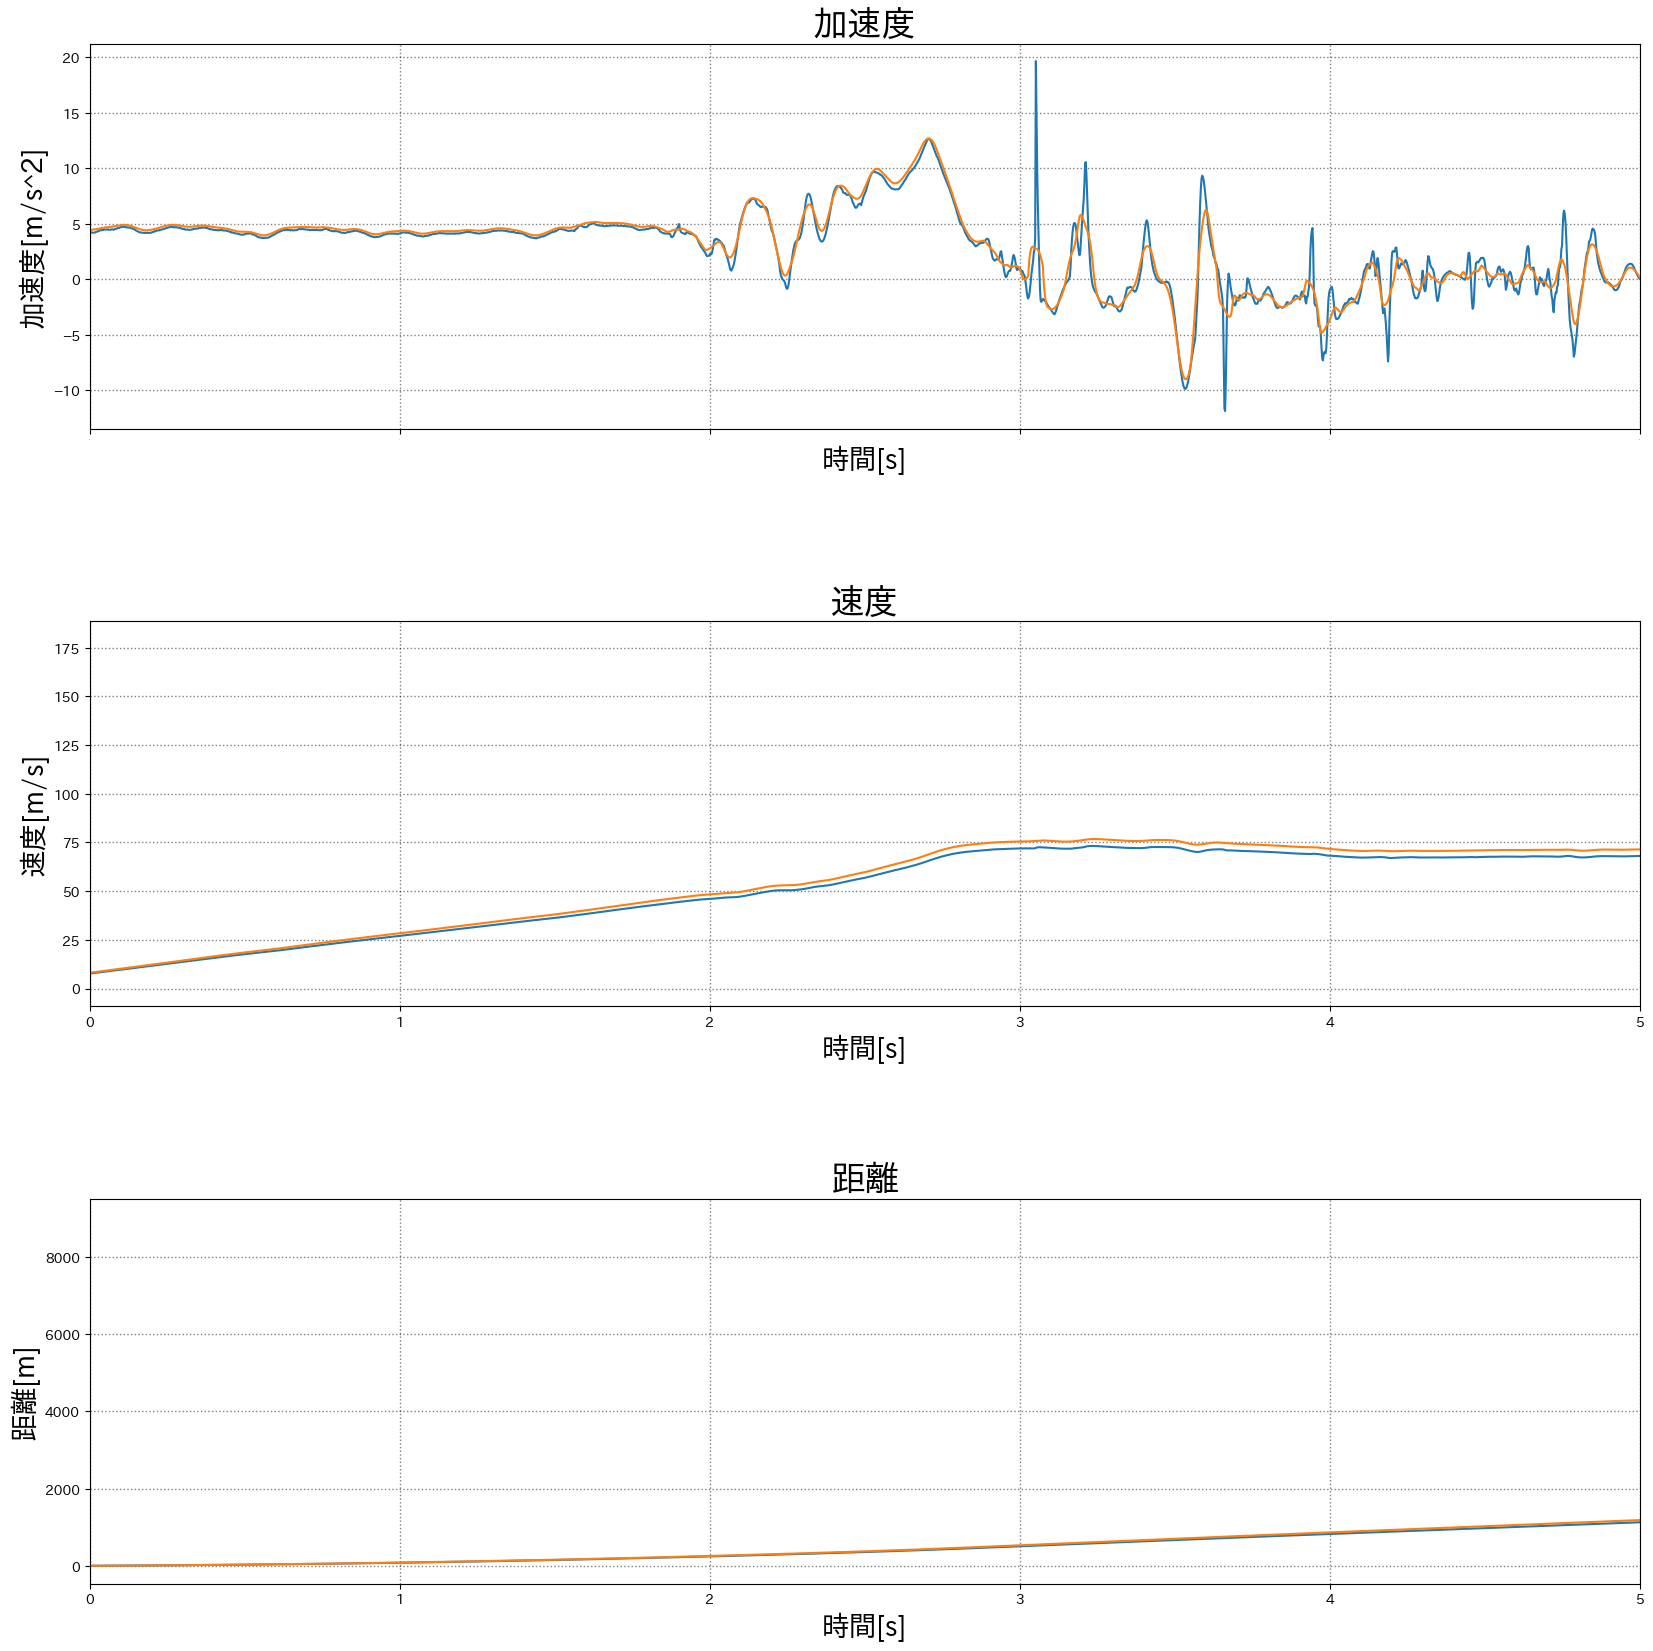

In [22]:
# グラフの描画
fig = plt.figure(figsize=(20, 20))
ax1 = fig.add_subplot(3, 1, 1)
plt.subplots_adjust(hspace=0.5)
ax1.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax1.set_title('加速度', fontdict={'size': fontsize_title})
ax1.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax1.set_ylabel('加速度[m/s^2]', fontdict={'size': fontsize_label})

ax2 = fig.add_subplot(3, 1, 2)
ax2.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax2.set_title('速度', fontdict={'size': fontsize_title})
ax2.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax2.set_ylabel('速度[m/s]', fontdict={'size': fontsize_label})

ax3 = fig.add_subplot(3, 1, 3)
ax3.grid(color='k', linestyle='dotted', linewidth=1, alpha=0.5, zorder=2)
ax3.set_title('距離', fontdict={'size': fontsize_title})
ax3.set_xlabel('時間[s]', fontdict={'size': fontsize_label})
ax3.set_ylabel('距離[m]', fontdict={'size': fontsize_label})

# データをプロット
ax1.plot(relative_time[:-window], data[:-window], label="a")
ax1.plot(relative_time[:-window], smooth_data, label="a'")
ax2.plot(relative_time[:-window], i_data[:-window], label="v")
ax2.plot(relative_time[:-window], smooth_i_data, label="v'")
ax3.plot(relative_time[:-window], i2_data[:-window], label="p")
ax3.plot(relative_time[:-window], smooth_i2_data, label="p'")

# 範囲を指定
ax1.set_xlim(*fig_range)
ax2.set_xlim(*fig_range)
ax3.set_xlim(*fig_range)

# メモリの設定
ax1.set_xticklabels(ax1.get_xticklabels(), fontsize=1)

# グラフを表示
plt.show()
